# Try the predict function

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from elle_ebene.baseline_model import initialize_model
from elle_ebene.simple_preprocessing import resize_img, to_numpy_rgb, squared_imgs, normalize
from elle_ebene.params import RESIZING_DIM
import numpy as np

In [3]:
from  PIL import Image
import os
import matplotlib.pyplot as plt
from io import BytesIO

In [4]:
abs_path = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data/Type 4"
valid_images = [".jpg",".jpeg",".png"]
imgs_list = []
for file in os.listdir(abs_path):
    ext = os.path.splitext(file)[1]
    if ext.lower() not in valid_images:
        continue
    img = Image.open(os.path.join(abs_path,file))
    imgs_list.append(img)

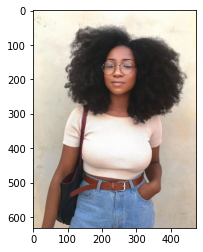

In [5]:
img = imgs_list[0]
plt.imshow(img)

In [6]:
byte_io = BytesIO()

img.save(byte_io, format = img.format)

In [7]:
bytes_img = byte_io.getvalue()

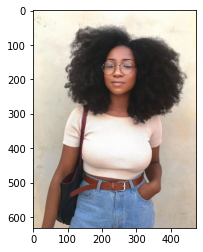

In [8]:
plt.imshow(img)

In [9]:
new = Image.open(BytesIO(bytes_img))

In [10]:
type(new)

PIL.JpegImagePlugin.JpegImageFile

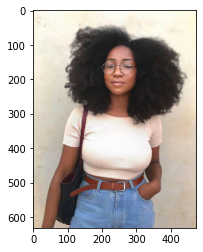

In [11]:
plt.imshow(new)

In [18]:
model = initialize_model()
model.load_weights("/home/aymeric/code/Aymeric-B/elle_ebene/model_weights/baseline/weights")

clean_image = normalize(np.asarray(squared_imgs(to_numpy_rgb([resize_img(img, RESIZING_DIM)]))))


In [13]:
prediction = model.predict(clean_image)

prediction

array([[0.08773905, 0.89368844]], dtype=float32)

In [14]:
pred = np.argmax(prediction , axis = -1)[0]
if pred == 1:
    type = "type 4"
else:
    type = "type 3"
type

'type 4'

In [21]:
from elle_ebene.predict import baseline

In [22]:
model = baseline(clean_image)

TypeError: cannot unpack non-iterable int object